**SQL Operations**

Data Sources : https://drive.google.com/drive/folders/13mbVTrh-7sRK-ItjNU1FnqLUBQhW8PNU?usp=sharing

Data References : https://www.kaggle.com/datasets/gregorut/videogamesales

In [ ]:
# Import package
import sqlite3
import pandas as pd

# Create a SQL connection to our SQLite database (serverless database)
# First, please upload your DB file (data sources) above "db.sqlite"
con = sqlite3.connect("/content/db.sqlite")

SELECT ALL TABLES

In [ ]:
# Query to get list of table on SQLite
sql_query = "SELECT name FROM sqlite_master WHERE type='table';"

# A cursor in SQL Server is a database object that allows us to retrieve each row at a time and manipulate its data
cur = con.cursor()

# The result of a "cursor.execute" can be iterated over by row
cur.execute(sql_query)

# Print list of tables
print("List of tables\n")
print(cur.fetchall())

List of tables

[('vgsales',)]


CREATE NEW TABLE

In [ ]:
#Droping Customers table if already exists.
cur.execute("DROP TABLE IF EXISTS Customers")

#Creating table as per requirement
sql ='''CREATE TABLE Customers(
   custID INT,
   custName VARCHAR(255),
   Address VARCHAR(255)
)'''

cur.execute(sql)
print("Table created successfully........")

# Commit your changes in the database
con.commit()

# Query to get list of table on SQLite
sql_query = "SELECT name FROM sqlite_master WHERE type='table';"

# The result of a "cursor.execute" can be iterated over by row
cur.execute(sql_query)

# Print list of tables
print("List of tables\n")
print(cur.fetchall())

Table created successfully........
List of tables

[('vgsales',), ('Customers',)]


INSERT DATA INTO TABLE

In [ ]:
# Preparing SQL queries to INSERT a record into the database.
cur.execute('''INSERT INTO Customers(
   custID, custName, Address) VALUES
   (1, 'Andi', 'Jakarta')''')
cur.execute('''INSERT INTO Customers(
   custID, custName, Address) VALUES
   (2, 'Budi', 'Bandung')''')
cur.execute('''INSERT INTO Customers(
   custID, custName, Address) VALUES
   (3, 'Tono', 'Semarang')''')
cur.execute('''INSERT INTO Customers(
   custID, custName, Address) VALUES
   (4, 'Rani', 'Semarang')''')
cur.execute('''INSERT INTO Customers(
   custID, custName, Address) VALUES
   (5, 'Dini', 'Bandung')''')

# Commit your changes in the database
con.commit()
print("Records inserted........")

# Query to get data on specific Table
sql_query ="SELECT * FROM Customers;"

# Using pandas dataframe to mapping data into table
df = pd.read_sql_query(sql_query,con)

# Show dataframe
df

Records inserted........


,custID,custName,Address
0,1,Andi,Jakarta
1,2,Budi,Bandung
2,3,Tono,Semarang
3,4,Rani,Semarang
4,5,Dini,Bandung
5,1,Andi,Jakarta
6,2,Budi,Bandung
7,3,Tono,Semarang
8,4,Rani,Semarang
9,5,Dini,Bandung


UPDATE DATA

In [ ]:
#Updating the records
sql = '''UPDATE Customers SET Address='Yogyakarta' WHERE custName= 'Tono' '''
cur.execute(sql)
print("Table updated...... ")

#Commit your changes in the database
con.commit()

#Fetching all the rows after the update
print("Contents of the Employee table after the update operation: ")

# Query to get data on specific Table
sql_query ="SELECT * FROM Customers;"

# Using pandas dataframe to mapping data into table
df = pd.read_sql_query(sql_query,con)

# Show dataframe
df

Table updated...... 
Contents of the Employee table after the update operation: 


,custID,custName,Address
0,1,Andi,Jakarta
1,2,Budi,Bandung
2,3,Tono,Yogyakarta
3,4,Rani,Semarang
4,5,Dini,Bandung
5,1,Andi,Jakarta
6,2,Budi,Bandung
7,3,Tono,Yogyakarta
8,4,Rani,Semarang
9,5,Dini,Bandung


DELETE DATA

In [ ]:
#Deleting records
sql = '''DELETE FROM Customers WHERE Address = "Semarang"'''
cur.execute(sql)
print("Table updated...... ")

#Commit your changes in the database
con.commit()

#Fetching all the rows after the update
print("Contents of the Employee table after the update operation: ")

# Query to get data on specific Table
sql_query ="SELECT * FROM Customers;"

# Using pandas dataframe to mapping data into table
df = pd.read_sql_query(sql_query,con)

# Show dataframe
df

Table updated...... 
Contents of the Employee table after the update operation: 


,custID,custName,Address
0,1,Andi,Jakarta
1,2,Budi,Bandung
2,3,Tono,Yogyakarta
3,5,Dini,Bandung
4,1,Andi,Jakarta
5,2,Budi,Bandung
6,3,Tono,Yogyakarta
7,5,Dini,Bandung


DROP TABLE

In [ ]:
#Doping Customers table
cur.execute("DROP TABLE Customers")
print("Table dropped... ")

# Commit your changes in the database
con.commit()

# Query to get list of table on SQLite
sql_query = "SELECT name FROM sqlite_master WHERE type='table';"

# The result of a "cursor.execute" can be iterated over by row
cur.execute(sql_query)

# Print list of tables
print("List of tables\n")
print(cur.fetchall())

Table dropped... 
List of tables

[('vgsales',)]


SELECT DATA FROM A DATABASE / TABLE

In [ ]:
# Query to get data on specific Table
sql_query ="SELECT * FROM vgsales;"

# Using pandas dataframe to mapping data into table
df = pd.read_sql_query(sql_query,con)

# Show dataframe
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


WHERE (FILTER / CONDITIONS)

In [ ]:
# Query to get data on specific Table
sql_query ="SELECT * FROM vgsales WHERE Global_Sales > 20;"

# Using pandas dataframe to mapping data into table
df = pd.read_sql_query(sql_query,con)

# Show dataframe
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


WHERE + AND

In [ ]:
# Query to get data on specific Table
sql_query ="SELECT * FROM vgsales WHERE Genre = 'Sports' AND Publisher = 'Nintendo' AND Global_Sales > 20;"

# Using pandas dataframe to mapping data into table
df = pd.read_sql_query(sql_query,con)

# Show dataframe
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
2,14,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
3,15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


WHERE + OR

In [ ]:
# Query to get data on specific Table
sql_query ="SELECT * FROM vgsales WHERE Genre = 'Action' OR Genre = 'Shooter';"

# Using pandas dataframe to mapping data into table
df = pd.read_sql_query(sql_query,con)

# Show dataframe
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
3,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
4,25,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
...,...,...,...,...,...,...,...,...,...,...,...
4587,16585,Planet Monsters,GBA,2001,Action,Titus,0.01,0.00,0.00,0.00,0.01
4588,16586,Carmageddon 64,N64,1999,Action,Virgin Interactive,0.01,0.00,0.00,0.00,0.01
4589,16588,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01
4590,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.00,0.01


LIKE

In [ ]:
# Query to get data on specific Table
sql_query ="SELECT * FROM vgsales WHERE Name LIKE '%Grand Theft Auto%';"

# Using pandas dataframe to mapping data into table
df = pd.read_sql_query(sql_query,con)

# Show dataframe
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
1,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
2,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,25,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
4,39,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
5,45,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
6,52,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
7,57,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
8,91,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72
9,198,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08


ORDER BY + LIMIT

In [ ]:
# Query to get data on specific Table
sql_query ="SELECT * FROM vgsales ORDER BY 'Global_Sales' LIMIT 7;"

# Using pandas dataframe to mapping data into table
df = pd.read_sql_query(sql_query,con)

# Show dataframe
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01


GROUP BY

In [ ]:
# Query to get data on specific Table
sql_query ="SELECT Publisher, SUM(Global_Sales) FROM vgsales GROUP BY Publisher ORDER BY SUM(Global_Sales) DESC;"

# Using pandas dataframe to mapping data into table
df = pd.read_sql_query(sql_query,con)

# Show dataframe
df

,Publisher,SUM(Global_Sales)
0,Nintendo,1782.79
1,Electronic Arts,1110.32
2,Activision,720.25
3,Sony Computer Entertainment,606.43
4,Ubisoft,474.55
...,...,...
598,DS,0.00
599,Fighting,0.00
600,Interworks Unlimited,0.00
601,Simulation,0.00


USECASE : Show the Top 5 Global Sales Publisher

In [ ]:
# Query to get data on specific Table
sql_query ="SELECT Publisher, SUM(Global_Sales) as Total_Global_Sales FROM vgsales GROUP BY Publisher ORDER BY SUM(Global_Sales) DESC LIMIT 7;"

# Using pandas dataframe to mapping data into table
df = pd.read_sql_query(sql_query,con)

# Show dataframe
df

,Publisher,Total_Global_Sales
0,Nintendo,1782.79
1,Electronic Arts,1110.32
2,Activision,720.25
3,Sony Computer Entertainment,606.43
4,Ubisoft,474.55
5,Take-Two Interactive,398.14
6,THQ,333.86


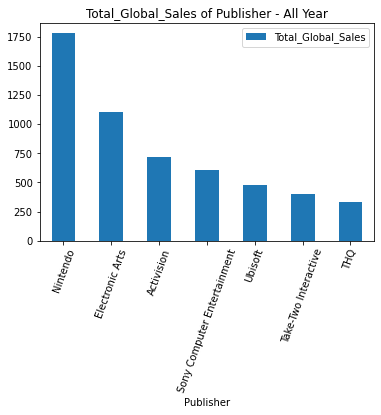

In [ ]:
import matplotlib.pyplot as plot

# Draw a vertical bar chart

df.plot.bar(x="Publisher", y="Total_Global_Sales", rot=70, title="Total_Global_Sales of Publisher - All Year");

plot.show(block=True);